In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import re
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

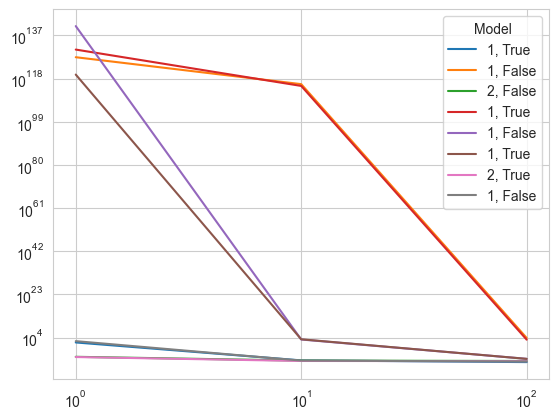

In [63]:
for file in Path("cache/LDS/contour").iterdir():
    df = pd.read_csv(file)
    inf_rows = df.index[df.isin([np.inf]).any(axis=1)]
    df = pd.concat([df.drop(inf_rows), df.loc[inf_rows]])
    df = df.groupby("n")["loss"].median().to_frame()
    l = int(re.search(r"l=(\d)", file.name).group(1))
    in_dist = re.search(r"in_dist=(\w+)", file.name).group(1) == "True"
    # poly = np.polyfit(df.index, df["loss"], 3)
    # poly_loss = np.poly1d(poly)(df.index)
    plt.plot(df.index, df["loss"], label=f"{l}, {in_dist}")
plt.yscale('log')
plt.xscale('log')
plt.legend(title="Model")
plt.show()

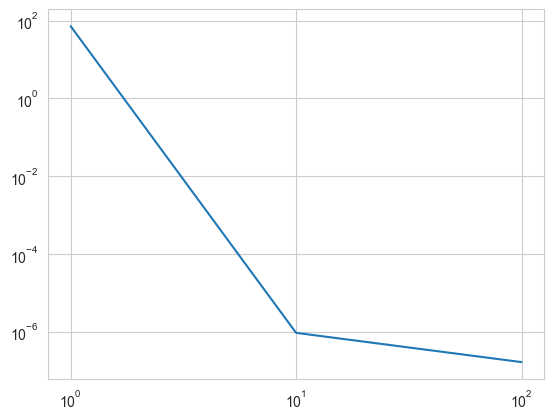

In [36]:
data = df.groupby("n")["loss"].median().to_frame()
plt.plot(data.index, data["loss"])
plt.yscale('log')
plt.xscale('log')

In [37]:
plt.contour([])

,loss
n,
1,7.220628e+01
10,9.274926e-07
100,1.639189e-07


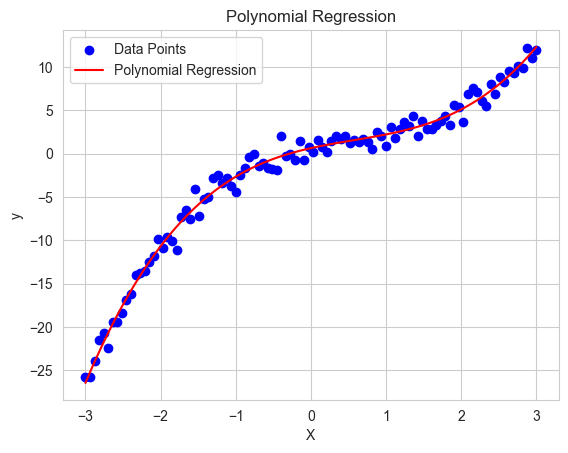

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + 2 * X + 1 + np.random.randn(100, 1)

# Apply polynomial feature transformation
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Fit linear regression model on transformed features
model = LinearRegression()
model.fit(X_poly, y)

# Generate points along x-axis for plotting
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
x_plot_poly = poly_features.transform(x_plot)

# Predict the values using the fitted model
y_pred = model.predict(x_plot_poly)

# Plot the original data points
plt.scatter(X, y, color='b', label='Data Points')

# Plot the polynomial regression curve
plt.plot(x_plot, y_pred, color='r', label='Polynomial Regression')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [55]:
np.array(df.index)

array([  1,  10, 100])